**Machine Learning Project: Predicting Titanic Survivors**

For this project I will demonstrate my ability to clean and process data for a machine learning model. The project will be based around the Kaggle Titanic Dataset in which information is given about each passenger to be used to predict if a passenger would survivor the disaster.


**Importing the needed libraries**

In [1]:
#importing pandas, numpy, and matplotlib for data exploration and presentation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing tools from sklearn : precrossing and the split tool
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing Tensorflow and Keras for building and using models
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D
import keras

#imporitng Random for random variable assigment and genreation
import random
from random import randint

In [2]:
#Generates a random number and sets the seed to that number
SEED = randint(0,1000000)
print(SEED)
random.seed(SEED)

787825


**Import Data**

In [3]:
#import Training Data
df_train = pd.read_csv("C:/Users/btheb/OneDrive/Desktop/train.csv")
#import Testing/Challenge Data
df_test = pd.read_csv("C:/Users/btheb/OneDrive/Desktop/test.csv")


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Things to Note:**

- This data has both numeric and categorical data
- There is missing data that needs to be addressed
- The Survived variable is our Y

**Filling Missing Data**

In [5]:
#find the missing data
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

For this project we neeed fill in the missing data for **Age** and **Embarked** location. 

**Embarked** Location is simple enough to fill in by using the most common embarked location.

In [6]:
pd.DataFrame(df_train.Embarked.value_counts())

,Embarked
S,644
C,168
Q,77


In [7]:
df_train['Embarked']=df_train['Embarked'].fillna('S')

**Age** is alittle more tricky to determine what value to fill in with. 

The best course of action is fill in with the median/average age of all passengers. 

In [8]:
#Find the mean age and replaces the blacnks/NA with that integer
MeanAge=df_train['Age'].mean()
print(MeanAge)
df_train['Age']=df_train['Age'].fillna(int(MeanAge))


29.69911764705882


In [9]:
#checks for any other Blanks or NA values
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

**Explore the data some more**

In [10]:
df_train.groupby('Pclass').agg({'Survived':'mean'})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
df_train.groupby('Sex').agg({'Survived': 'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


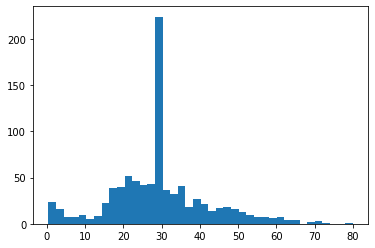

In [12]:
plt.hist(df_train.query("Age>0").Age, bins=40)
plt.show()

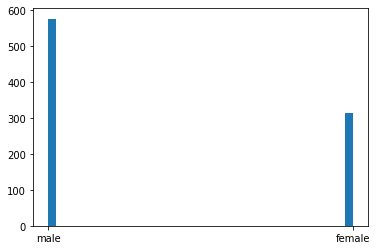

In [13]:
plt.hist(df_train.Sex, bins=40)
plt.show()

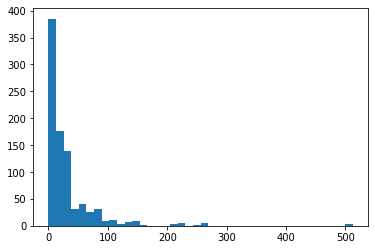

In [14]:
plt.hist(df_train.Fare,bins=40)
plt.show()

**Pre-Processing the data**

Since the data has some catagorical variable , we must transform them into a usable format. 

This is accomplished by encoding them. This means that each catagory is assigned a numeric value. 

For example in the catagory **Sex** , Male is assigned to be 0 while female is assigned to be 1.

In [15]:
#using the preprocessing package from SkLearn to encoded our variables. 
le =preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Embarked'] = str(df_train['Embarked'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


Next we have to condense Dataframe to be just the variable we want to use

In [17]:
#Overwrite the data frame to be just the variables that are going to be used in the model
df_train = df_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [18]:
#Splits the data frame into the usable parts of X and Y.
dfx = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
dfy = df_train[['Survived']]
#Turns the new parts into arrays
dfx = np.asarray(dfx)
dfy = np.asarray(dfy)


**Model**

I am going to create a Neural Network for this project.

**Creating the Model**

Using Keras and Tensorflow backend to create a model.

Models are made up of several parts:

**Layers** - The basic building blocks of a NN. Each layer does something differnt when a array or object passes through it.

**Loss Function** - The way the NN computes the distance between the current output and expected output.

**Optimizer**- The method in which the model changes its attributes to reduce Loss.

In [19]:
#Building the Model. Each line represents a layer. The number refers to the amount of Nodes in each layers.

model = Sequential()

model.add(Dense(42,kernel_initializer = 'uniform',activation = None))
model.add(Dense(168,kernel_initializer = 'uniform', activation = None))
model.add(Dense(336,kernel_initializer = 'uniform', activation = None))
model.add(Dense(672,kernel_initializer = 'uniform',activation = 'relu'))

model.add(Dense(168,kernel_initializer = 'uniform', activation = None))
model.add(Dense(336,kernel_initializer = 'uniform', activation = None))
model.add(Dense(168,kernel_initializer = 'uniform',activation = None))
model.add(Dense(672,kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(336,kernel_initializer = 'uniform',activation = None))
model.add(Dense(168,kernel_initializer = 'uniform', activation = None))
model.add(Dense(1344,kernel_initializer = 'uniform', activation = None))
model.add(Dense(168,kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(1, activation= 'sigmoid'))  

#Compling the model. 
#Loss function is set to binary crossentropy which is a loss function used when there are only two choices.
#Optimizer is set to adam. Adam conbines AdaGrad and RMSProp to achieve good results at a faster rate.
model.compile(loss= "binary_crossentropy", optimizer='adam', metrics=['accuracy'])


**Running the Model**

In [20]:
Model = model.fit(dfx,dfy, epochs=100, batch_size=50, validation_split = 0.2)

Epoch 1/100
15/15 [==============================] - 1s 33ms/step - loss: 0.6707 - accuracy: 0.5799 - val_loss: 0.6283 - val_accuracy: 0.6425
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6483 - accuracy: 0.6264 - val_loss: 0.5851 - val_accuracy: 0.7039
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6235 - accuracy: 0.6404 - val_loss: 0.5868 - val_accuracy: 0.7151
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6145 - accuracy: 0.6468 - val_loss: 0.5455 - val_accuracy: 0.7263
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6228 - accuracy: 0.6640 - val_loss: 0.5434 - val_accuracy: 0.7263
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6173 - accuracy: 0.6919 - val_loss: 0.5342 - val_accuracy: 0.7151
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6055 - accuracy: 0.6867 - val_loss: 0.5254 - val_accuracy: 0.7598
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5028 - accuracy: 0.7823 - val_loss: 0.4166 - val_accuracy: 0.8212
Epoch 60/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5301 - accuracy: 0.7773 - val_loss: 0.3951 - val_accuracy: 0.8492
Epoch 61/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5378 - accuracy: 0.7713 - val_loss: 0.4266 - val_accuracy: 0.8324
Epoch 62/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4714 - accuracy: 0.8015 - val_loss: 0.4706 - val_accuracy: 0.8156
Epoch 63/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4804 - accuracy: 0.7992 - val_loss: 0.4390 - val_accuracy: 0.8212
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5163 - accuracy: 0.7493 - val_loss: 0.4248 - val_accuracy: 0.8380
Epoch 65/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4901 - accuracy: 0.7714 - val_loss: 0.4058 - val_accuracy: 0.8380
Epoch

**Validation**

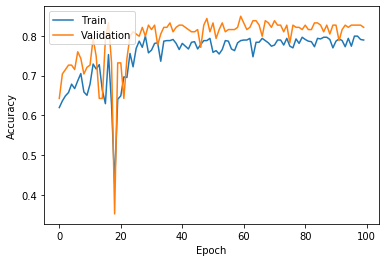

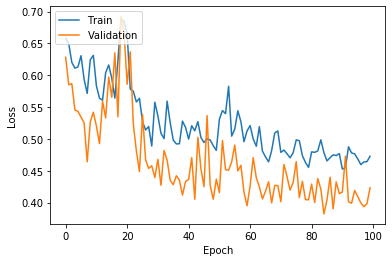

In [21]:
def plot_hist(Model):
    plt.plot(Model.history["accuracy"])
    plt.plot(Model.history["val_accuracy"])
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

def plot_loss(Model):
    plt.plot(Model.history["loss"])
    plt.plot(Model.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show
    
plot_hist(Model)
plot_loss(Model)

**Using Model**

Look at the test data to see if there are any blanks and fill them in 

In [22]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [23]:
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Embarked']=str(df_test['Embarked'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])
df_test['Age']=df_test['Age'].fillna(MeanAge)
df_test['Fare']=df_test['Fare'].fillna(0)

**Break the data into the useable data**

In [24]:
df_test = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df_test =np.array(df_test)

**Create a loop to predict if a passenger survived**

In [25]:
for row in df_test:
    row = row.reshape(1,7)
    predict = model.predict(row)
    print(row)
    print(round(float(predict)))




[[ 3.      1.     34.5     0.      0.      7.8292  0.    ]]
0
[[ 3.  0. 47.  1.  0.  7.  0.]]
1
[[ 2.      1.     62.      0.      0.      9.6875  0.    ]]
0
[[ 3.      1.     27.      0.      0.      8.6625  0.    ]]
0
[[ 3.      0.     22.      1.      1.     12.2875  0.    ]]
1
[[ 3.     1.    14.     0.     0.     9.225  0.   ]]
0
[[ 3.      0.     30.      0.      0.      7.6292  0.    ]]
1
[[ 2.  1. 26.  1.  1. 29.  0.]]
0
[[ 3.      0.     18.      0.      0.      7.2292  0.    ]]
1
[[ 3.    1.   21.    2.    0.   24.15  0.  ]]
0
[[ 3.          1.         29.69911765  0.          0.          7.8958
   0.        ]]
0
[[ 1.  1. 46.  0.  0. 26.  0.]]
0
[[ 1.      0.     23.      1.      0.     82.2667  0.    ]]
1
[[ 2.  1. 63.  1.  0. 26.  0.]]
0
[[ 1.     0.    47.     1.     0.    61.175  0.   ]]
1
[[ 2.      0.     24.      1.      0.     27.7208  0.    ]]
1
[[ 2.    1.   35.    0.    0.   12.35  0.  ]]
0
[[ 3.     1.    21.     0.     0.     7.225  0.   ]]
0
[[ 3.     0.    27.

[[ 3.    1.   22.    0.    0.    8.05  0.  ]]
0
[[ 1.          1.         29.69911765  0.          0.         26.55
   0.        ]]
0
[[ 2.  1. 30.  1.  1. 26.  0.]]
0
[[ 1.      0.     23.      0.      1.     83.1583  0.    ]]
1
[[ 3.          1.         29.69911765  0.          0.          7.8958
   0.        ]]
0
[[ 3.   1.  60.5  0.   0.   0.   0. ]]
0
[[ 3.      0.     36.      0.      2.     12.1833  0.    ]]
1
[[ 3.      1.     13.      4.      2.     31.3875  0.    ]]
0
[[ 3.    1.   24.    0.    0.    7.55  0.  ]]
0
[[  1.       0.      29.       0.       0.     221.7792   0.    ]]
1
[[ 3.      0.     23.      0.      0.      7.8542  0.    ]]
1
[[ 1.    1.   42.    0.    0.   26.55  0.  ]]
0
[[ 3.     0.    26.     0.     2.    13.775  0.   ]]
1
[[ 3.          0.         29.69911765  0.          0.          7.7333
   0.        ]]
1
[[ 3.      1.      7.      1.      1.     15.2458  0.    ]]
0
[[ 2.   0.  26.   0.   0.  13.5  0. ]]
1
[[ 3.          1.         29.69911765  0.   

[[ 3.          1.         29.69911765  0.          0.          7.2292
   0.        ]]
0
[[ 1.      1.     53.      1.      1.     81.8583  0.    ]]
1
[[ 3.   1.  36.   0.   0.   9.5  0. ]]
0
[[ 3.      1.     26.      0.      0.      7.8958  0.    ]]
0
[[ 2.      0.      1.      1.      2.     41.5792  0.    ]]
1
[[ 3.          1.         29.69911765  2.          0.         21.6792
   0.        ]]
0
[[ 1.   1.  30.   0.   0.  45.5  0. ]]
0
[[ 3.      1.     29.      0.      0.      7.8542  0.    ]]
0
[[ 3.     1.    32.     0.     0.     7.775  0.   ]]
0
[[ 2.          1.         29.69911765  0.          0.         15.0458
   0.        ]]
0
[[ 2.  1. 43.  0.  1. 21.  0.]]
0
[[ 3.      1.     24.      0.      0.      8.6625  0.    ]]
0
[[ 3.          0.         29.69911765  0.          0.          7.75
   0.        ]]
1
[[ 1.    0.   64.    1.    1.   26.55  0.  ]]
1
[[  1.     1.    30.     1.     2.   151.55   0.  ]]
1
[[3.   1.   0.83 0.   1.   9.35 0.  ]]
0
[[ 1.   1.  55.   1.   1.

In [27]:
model.save(r'C:/Users/btheb/OneDrive/Desktop/Titanic/upload/')


INFO:tensorflow:Assets written to: C:/Users/btheb/OneDrive/Desktop/Titanic/upload/assets
